**ESAME 24-01-2023**

In [45]:
#Import the useful packages
import pandas as pd 
import numpy as np 
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
from fitter import Fitter

**Phase 1: preliminary analysis on the dataset**

In [46]:
#Read the dataset 
df = pd.read_csv("GERD_SCIENCE_17012023090805122.csv")

In [47]:
#Quick info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70477 entries, 0 to 70476
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SECTOR                 70477 non-null  object 
 1   Sector of Performance  70477 non-null  object 
 2   SCIENCE                70477 non-null  object 
 3   Field of Sciences      70477 non-null  object 
 4   UNITS_EXP              70477 non-null  object 
 5   Measure                70477 non-null  object 
 6   COU                    70477 non-null  object 
 7   Country                70477 non-null  object 
 8   YEAR                   70477 non-null  int64  
 9   Year                   70477 non-null  int64  
 10  Unit Code              70477 non-null  object 
 11  Unit                   70477 non-null  object 
 12  PowerCode Code         70477 non-null  int64  
 13  PowerCode              70477 non-null  object 
 14  Reference Period Code  23462 non-null  float64
 15  Re

In [48]:
#Show the first ten rows of the dataset
df.head(10)

,SECTOR,Sector of Performance,SCIENCE,Field of Sciences,UNITS_EXP,Measure,COU,Country,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1981,1981,AUD,Australian Dollar,6,Millions,NaN,NaN,396.6,c,National estimate or projection
1,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1983,1983,AUD,Australian Dollar,6,Millions,NaN,NaN,506.8,c,National estimate or projection
2,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1984,1984,AUD,Australian Dollar,6,Millions,NaN,NaN,721.3,c,National estimate or projection
3,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1985,1985,AUD,Australian Dollar,6,Millions,NaN,NaN,947.9,c,National estimate or projection
4,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1986,1986,AUD,Australian Dollar,6,Millions,NaN,NaN,1280.1,NaN,NaN
5,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1987,1987,AUD,Australian Dollar,6,Millions,NaN,NaN,1455.7,NaN,NaN
6,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1988,1988,AUD,Australian Dollar,6,Millions,NaN,NaN,1798.3,NaN,NaN
7,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1989,1989,AUD,Australian Dollar,6,Millions,NaN,NaN,1989.7,NaN,NaN
8,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1990,1990,AUD,Australian Dollar,6,Millions,NaN,NaN,2099.8,NaN,NaN
9,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1991,1991,AUD,Australian Dollar,6,Millions,NaN,NaN,2364.6,NaN,NaN


*For the purposes of the investigation we take into consideration a subset of the full dataset (data in USD units).*

In [49]:
df["Unit Code"].unique()

array(['AUD', 'USD', 'EUR', 'CAD', 'CZK', 'DKK', 'HUF', 'ISK', 'JPY',
       'KRW', 'MXN', 'NZD', 'NOK', 'PLN', 'SEK', 'CHF', 'TRY', 'GBP',
       'ARS', 'CLP', 'CNY', 'ILS', 'RON', 'RUB', 'SGD', 'ZAR', 'TWD'],
      dtype=object)

In [50]:
#Take the subset of USD-values
df_USD = df[df["Unit Code"] == 'USD']
df_USD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47173 entries, 30 to 70476
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SECTOR                 47173 non-null  object 
 1   Sector of Performance  47173 non-null  object 
 2   SCIENCE                47173 non-null  object 
 3   Field of Sciences      47173 non-null  object 
 4   UNITS_EXP              47173 non-null  object 
 5   Measure                47173 non-null  object 
 6   COU                    47173 non-null  object 
 7   Country                47173 non-null  object 
 8   YEAR                   47173 non-null  int64  
 9   Year                   47173 non-null  int64  
 10  Unit Code              47173 non-null  object 
 11  Unit                   47173 non-null  object 
 12  PowerCode Code         47173 non-null  int64  
 13  PowerCode              47173 non-null  object 
 14  Reference Period Code  23462 non-null  float64
 15  Refere

In [51]:
#Remove from the dataframe the rows which contain NaN as 'Value'
df_USD = df_USD.dropna(subset=['Value'])

In [1]:
#Boxplot distribution of the values
ax = sns.boxplot(data=df_USD, y="Value", fliersize=0, color='green')
ax.set_ylim([-100, 4000])
ax.set_ylabel("Value(USD)")
ax.set_title("USD-values boxplot distribution from 1981 until 2015")

NameError: name 'sns' is not defined

**Fig.1: Boxplot distribution of all the values with outliers turned off. The values on the y-axis are measured in millions of US dollars.**

*The plot above shows the full boxplot distribution of the values. We can see that 50% of the values are included in the range (0,1000).*

Text(0.5, 1.0, 'USD-values histplot distribution from 1981 until 2015')

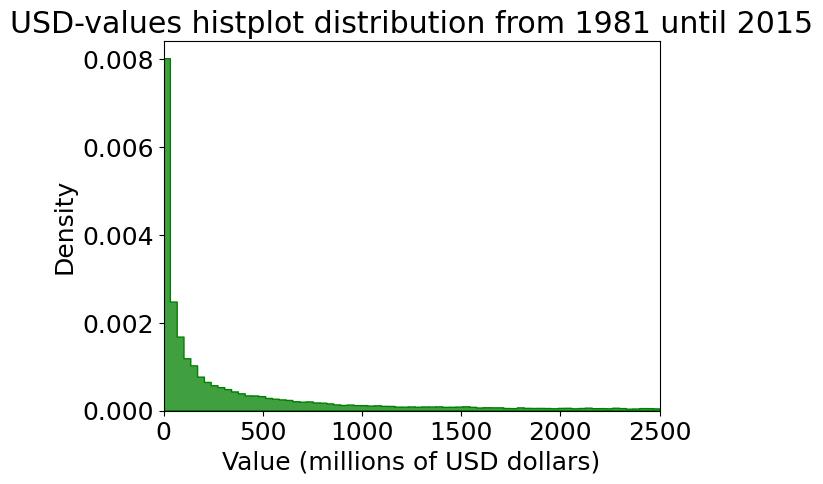

In [53]:
#Histplot distribution of the values
g = sns.histplot(data=df_USD, x="Value", bins=10000,
                 stat="density", kde=False, color='green',
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([0, 2500])
g.set_xlabel("Value (millions of USD dollars)")
g.set_title("USD-values histplot distribution from 1981 until 2015")

**Fig.2: Histplot distribution of all the values. For the sake of readibility, the limits on the x-axis are between 0 and 2500, since 75% of values are included in this range (see boxplot in Fig.1).**

**Temporal analysis**

In [54]:
years = df_USD["Year"].unique()
years.sort()
sec_perf = df_USD["Sector of Performance"].unique()
m = len(years)
n = len(sec_perf)

In [55]:
#Compute and plot the means for each sector of performance in the period 1981-2015
means = np.zeros((n, m), dtype=float) #Matrix with number of rows equal to the number of sectors and columns equal to the number of years
for i in range(n):
    for j in range(m): 
        df_appo = df_USD[(df_USD["Sector of Performance"] == sec_perf[i]) & (df_USD["Year"] == years[j])]
        means[i,j] = df_appo["Value"].mean()

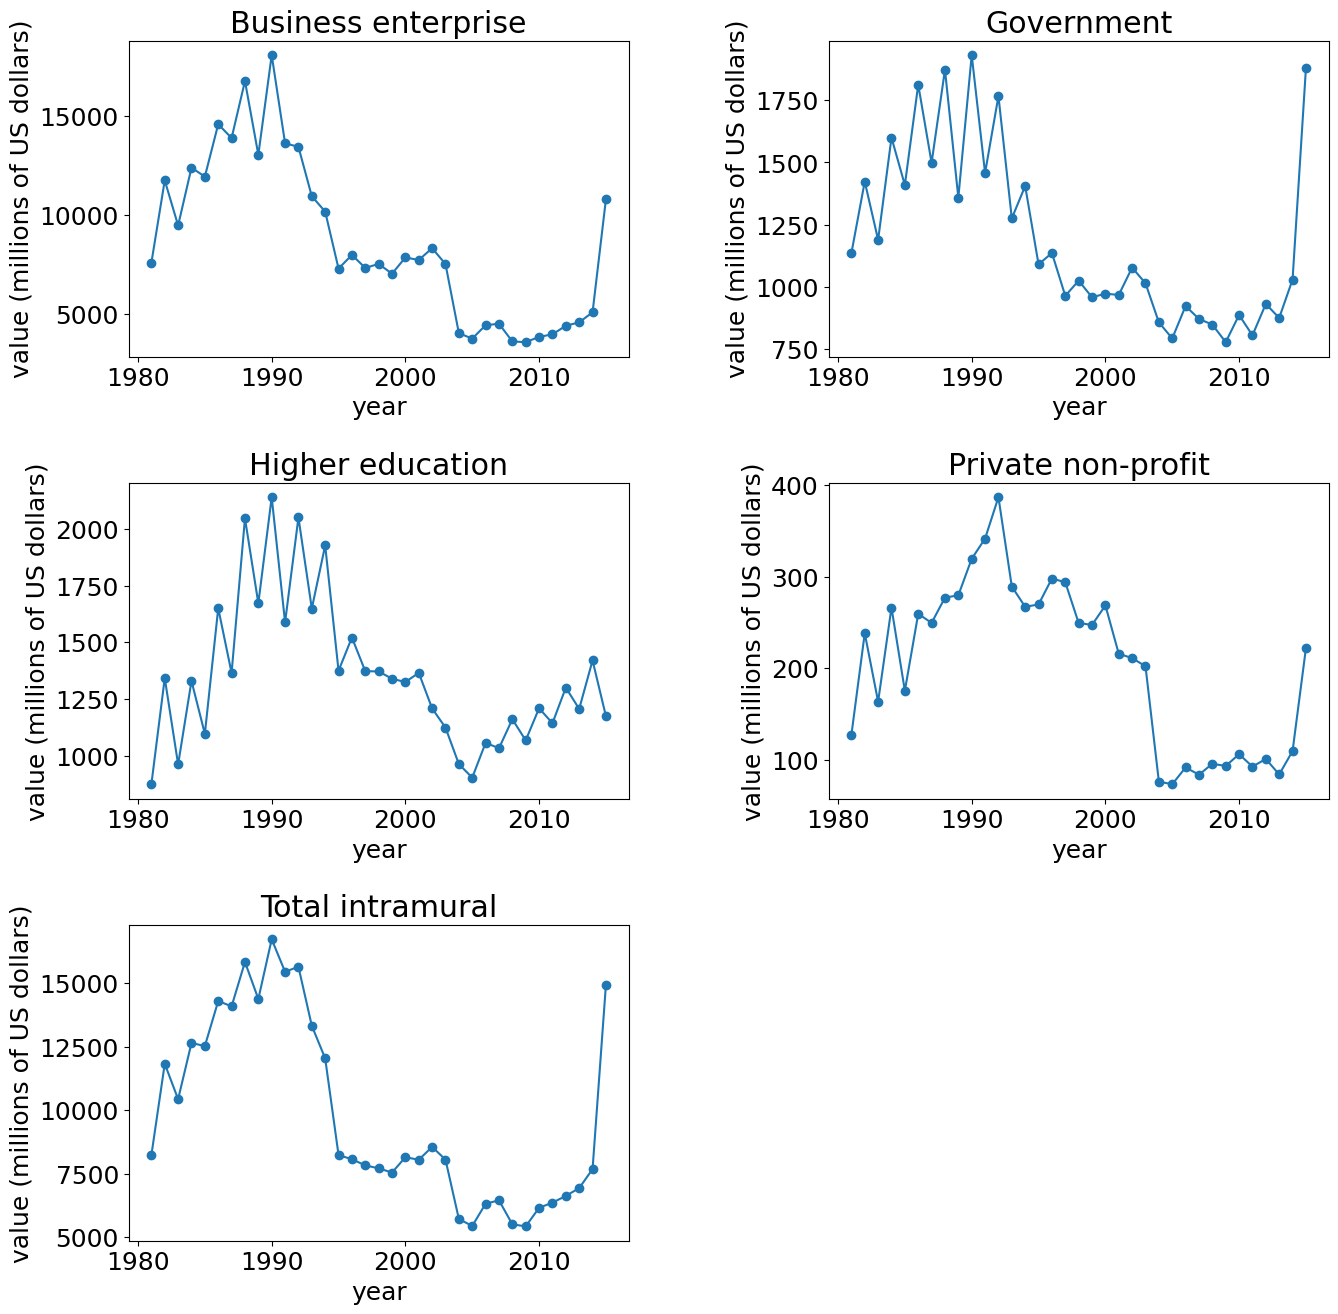

In [56]:
"""
REWRITE THIS PIECE OF CODE
"""

plt.rcParams.update({'font.size': 18})
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.scatter(years,means[0, :])
ax1.plot(years,means[0, :])
ax2.scatter(years,means[1, :])
ax2.plot(years,means[1, :])
ax3.scatter(years,means[2, :])
ax3.plot(years,means[2, :])
ax4.scatter(years,means[3, :])
ax4.plot(years,means[3, :])
ax5.scatter(years,means[4, :])
ax5.plot(years,means[4, :])
ax1.set_title(sec_perf[0])
ax1.set_xlabel('year')
ax1.set_ylabel('value (millions of US dollars)')
ax2.set_title(sec_perf[1])
ax2.set_xlabel('year')
ax2.set_ylabel('value (millions of US dollars)')
ax3.set_title(sec_perf[2])
ax3.set_xlabel('year')
ax3.set_ylabel('value (millions of US dollars)')
ax4.set_title(sec_perf[3])
ax4.set_xlabel('year')
ax4.set_ylabel('value (millions of US dollars)')
ax5.set_title(sec_perf[4])
ax5.set_xlabel('year')
ax5.set_ylabel('value (millions of US dollars)')
plt.show()

**Fig.3:**

In [57]:
science_field = df_USD["Field of Sciences"].unique()
k = len(science_field)

10

In [58]:
#Compute and plot the means for science-field in the period 1981-2015
means = np.zeros((k,m), dtype=float) #Matrix with number of rows equal to the number of fields and columns equal to the number of years
for i in range(k):
    for j in range(m): 
        df_appo = df_USD[(df_USD["Field of Sciences"] == science_field[i]) & (df_USD["Year"] == years[j])]
        means[i,j] = df_appo["Value"].mean()

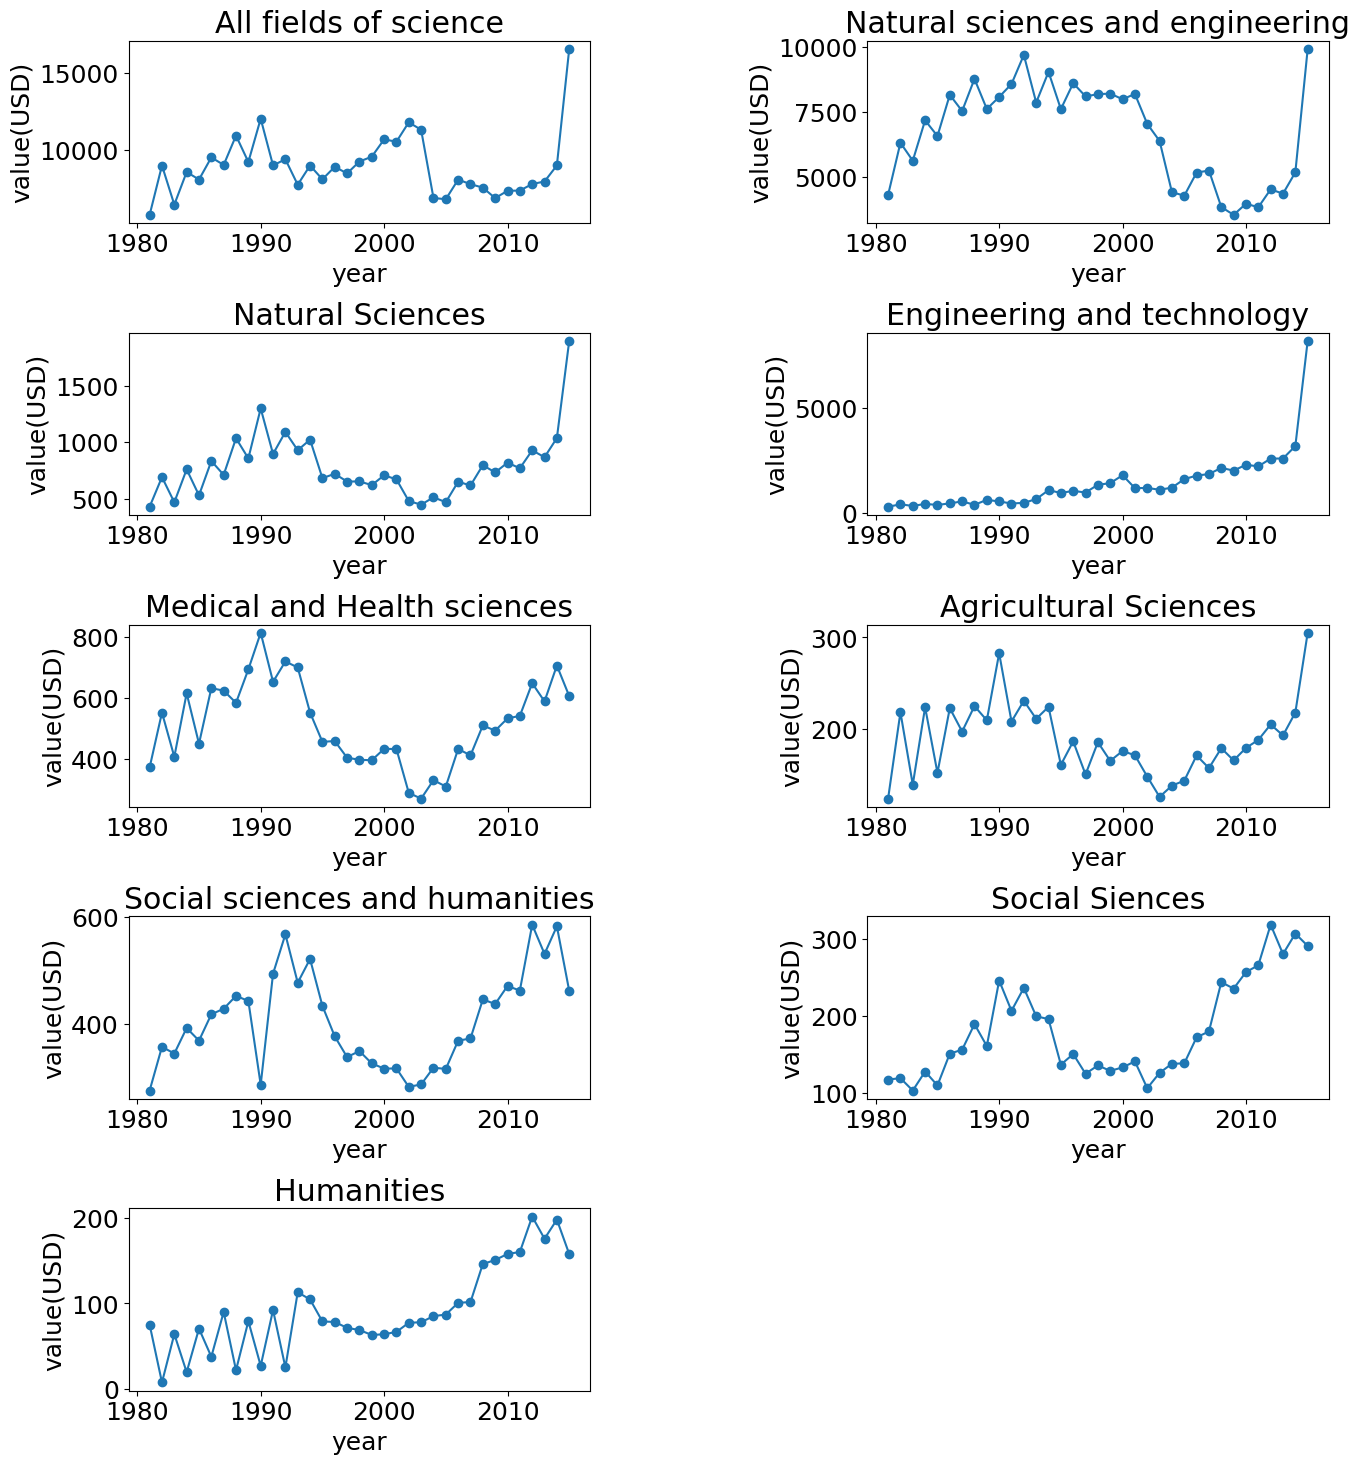

In [59]:
"""
REWRITE THIS PIECE OF CODE
"""
plt.rcParams.update({'font.size': 18})
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.0, 
                    wspace=0.6, 
                    hspace=0.6)
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
#ax10 = fig.add_subplot(2510)
ax1.scatter(years,means[0, :])
ax1.plot(years,means[0, :])
ax2.scatter(years,means[1, :])
ax2.plot(years,means[1, :])
ax3.scatter(years,means[2, :])
ax3.plot(years,means[2, :])
ax4.scatter(years,means[3, :])
ax4.plot(years,means[3, :])
ax5.scatter(years,means[4, :])
ax5.plot(years,means[4, :])
ax6.scatter(years,means[5, :])
ax6.plot(years,means[5, :])
ax7.scatter(years,means[6, :])
ax7.plot(years,means[6, :])
ax8.scatter(years,means[7, :])
ax8.plot(years,means[7, :])
ax9.scatter(years,means[8, :])
ax9.plot(years,means[8, :])
#ax10.scatter(years,means[9, :])
#ax10.plot(years,means[9, :])
ax1.set_title(science_field[0])
ax1.set_xlabel('year')
ax1.set_ylabel('value(USD)')
ax2.set_title(science_field[1])
ax2.set_xlabel('year')
ax2.set_ylabel('value(USD)')
ax3.set_title(science_field[2])
ax3.set_xlabel('year')
ax3.set_ylabel('value(USD)')
ax4.set_title(science_field[3])
ax4.set_xlabel('year')
ax4.set_ylabel('value(USD)')
ax5.set_title(science_field[4])
ax5.set_xlabel('year')
ax5.set_ylabel('value(USD)')
ax6.set_title(science_field[5])
ax6.set_xlabel('year')
ax6.set_ylabel('value(USD)')
ax7.set_title(science_field[6])
ax7.set_xlabel('year')
ax7.set_ylabel('value(USD)')
ax8.set_title(science_field[7])
ax8.set_xlabel('year')
ax8.set_ylabel('value(USD)')
ax9.set_title(science_field[8])
ax9.set_xlabel('year')
ax9.set_ylabel('value(USD)')
#ax10.set_title(science_field[9])
#ax10.set_xlabel('year')
#ax10.set_ylabel('value (millions of US dollars)')
plt.show()

**Fig.4:**

**Phase 2: Statistical significance**

*We investigate the hypothesis that the values labeled as "Engineering and technology" in two different areas are extracted from the same distribution. 
In order to do this, we first divide the dataset in two subsets and then we perform the KS 2-sample test.*

In [68]:
#Dataset split
set_he_1 = df_USD[(df_USD["Sector of Performance"] == "Higher education") & (df_USD["Field of Sciences"] == "Engineering and technology")].Value
set_gov_1 = df_USD[(df_USD["Sector of Performance"] == "Government") & (df_USD["Field of Sciences"] == "Engineering and technology")].Value

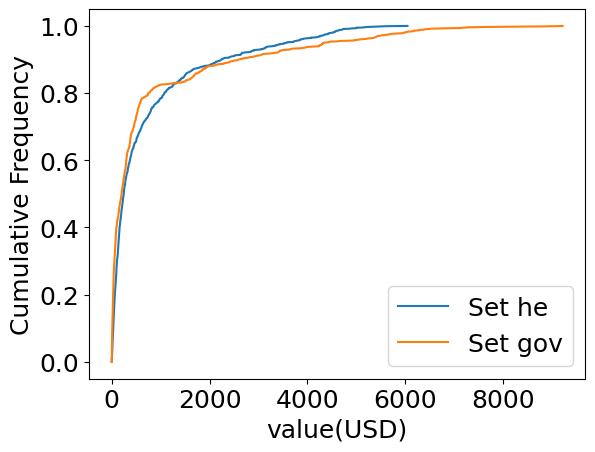

In [69]:
#Cumulative distributions
xmin=np.min(df_USD.Value)
xmax=np.max(df_USD.Value)
x = np.linspace(xmin,xmax,101)
y1=np.sort(set_he_1)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(set_gov_1)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('value(USD)')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Set he")
plt.plot(y2,idx2,label="Set gov")
plt.legend()

**Fig.5:**

In [67]:
#KS test
alpha = 0.01
D,p_value=scipy.stats.ks_2samp(set_he_1,set_gov_1)
D,p_value

(0.1421662648370723, 1.4158420857911537e-10)

*Since the resultant p-value < $\alpha$, we can reject the null hypothesis and assert that the values are extracted from two separated distributions*

*We investigate the hypothesis that the values labeled as "All fields of science" in two different areas are extracted from the same distribution. 
In order to do this, we first divide the dataset in two subsets and then we perform the KS 2-sample test.*

In [70]:
set_he_2 = df_USD[(df_USD["Sector of Performance"] == "Higher education") & (df_USD["Field of Sciences"] == "All fields of science")].Value
set_gov_2 = df_USD[(df_USD["Sector of Performance"] == "Government") & (df_USD["Field of Sciences"] == "All fields of science")].Value

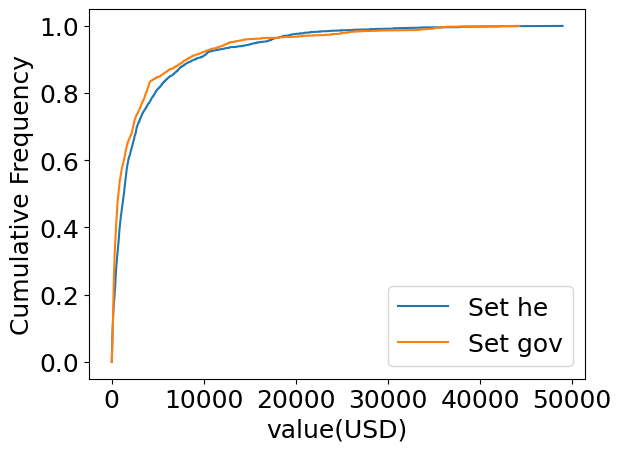

In [71]:
xmin=np.min(df_USD.Value)
xmax=np.max(df_USD.Value)
x = np.linspace(xmin,xmax,101)
y1=np.sort(set_he_2)
idx1 = [ i/len(y1) for i in range(len(y1))]
y2=np.sort(set_gov_2)
idx2 = [ i/len(y2) for i in range(len(y2))]
plt.xlabel('value(USD)')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Set he")
plt.plot(y2,idx2,label="Set gov")
plt.legend()

**Fig.6:**

In [72]:
alpha = 0.01
D,p_value=scipy.stats.ks_2samp(set_he_2,set_gov_2)
D,p_value

(0.15287588294651866, 1.2880645567830294e-20)

*As in the previous case, the resultant p-value < $\alpha$ and therefore we can reject the null hypothesis asserting that the values are extracted from two separated distributions*

**Phase 3: fit of the data distribution**

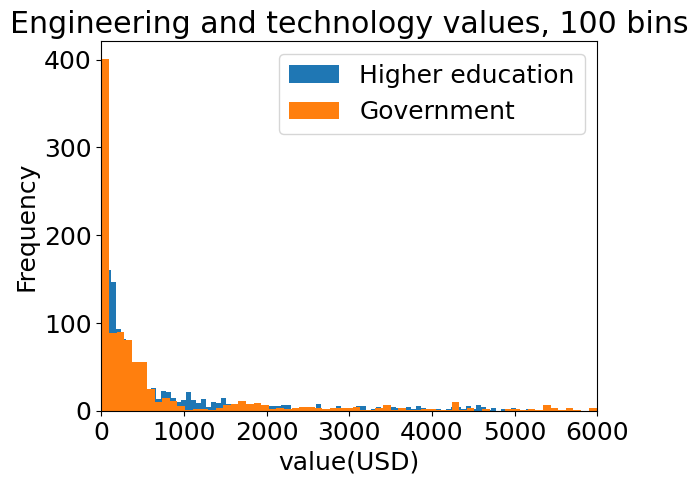

In [79]:
plt.hist(set_he_1,bins=100, label="Higher education")
plt.hist(set_gov_1,bins=100, label="Government")
plt.xlabel('value(USD)')
plt.ylabel('Frequency')
plt.title('Engineering and technology values, 100 bins')
plt.xlim([0, 6000])
plt.legend()

In [81]:
params = scipy.stats.expon.fit(df_USD.Value)

In [82]:
params

(0.0, 3009.113642957276)

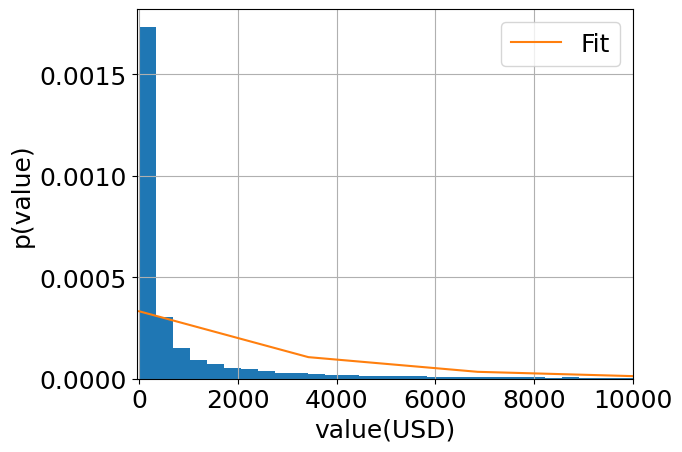

In [83]:
plt.rcParams.update({'font.size': 18})
xmin = np.min(df_USD.Value)
xmax = np.max(df_USD.Value)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
df_USD.Value.hist(bins=1000, density=True)
# fit
E = scipy.stats.expon(params[0], params[1])
plt.plot(x, E.pdf(x), label="Fit")
plt.xlabel('value(USD)')
plt.ylabel('p(value)')
plt.xlim([-50, 10000])
plt.legend()

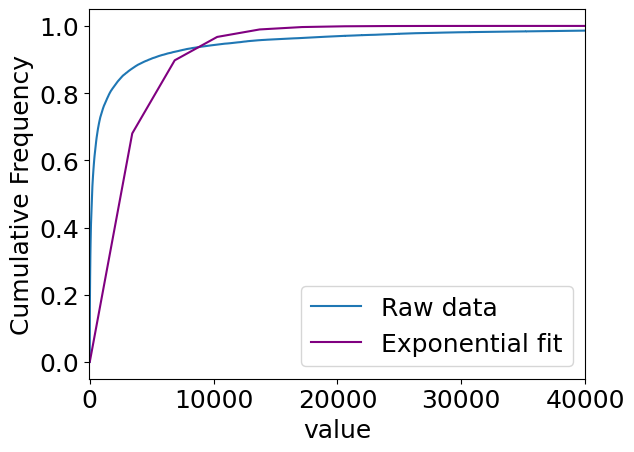

In [88]:
#Cumulative distributions
xmin = np.min(df_USD.Value)
xmax = np.max(df_USD.Value)
x = np.linspace(xmin,xmax,101)
y = np.sort(df_USD.Value)
idx = [i/len(y) for i in range(len(y))]
plt.xlabel('value')
plt.ylabel('Cumulative Frequency')
plt.xlim([-50,40000])
plt.plot(y,idx,label="Raw data")
plt.plot(x, E.cdf(x), label="Exponential fit", color="purple")
plt.legend()